In [1]:
import nltk 
import pandas as pd 
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%pylab inline
from nltk.corpus import stopwords

import pycountry as pc

Populating the interactive namespace from numpy and matplotlib


In [2]:
email_path = "./hillary-clinton-emails/Emails.csv"
email_df = pd.read_csv(email_path, encoding="utf-8")

In [3]:
email_df.columns

Index([u'Id', u'DocNumber', u'MetadataSubject', u'MetadataTo', u'MetadataFrom',
       u'SenderPersonId', u'MetadataDateSent', u'MetadataDateReleased',
       u'MetadataPdfLink', u'MetadataCaseNumber', u'MetadataDocumentClass',
       u'ExtractedSubject', u'ExtractedTo', u'ExtractedFrom', u'ExtractedCc',
       u'ExtractedDateSent', u'ExtractedCaseNumber', u'ExtractedDocNumber',
       u'ExtractedDateReleased', u'ExtractedReleaseInPartOrFull',
       u'ExtractedBodyText', u'RawText'],
      dtype='object')

In [4]:
email_df.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


# QUESTION 1 

## WORLDCLOUD RAW

In [5]:
email_df.columns

Index([u'Id', u'DocNumber', u'MetadataSubject', u'MetadataTo', u'MetadataFrom',
       u'SenderPersonId', u'MetadataDateSent', u'MetadataDateReleased',
       u'MetadataPdfLink', u'MetadataCaseNumber', u'MetadataDocumentClass',
       u'ExtractedSubject', u'ExtractedTo', u'ExtractedFrom', u'ExtractedCc',
       u'ExtractedDateSent', u'ExtractedCaseNumber', u'ExtractedDocNumber',
       u'ExtractedDateReleased', u'ExtractedReleaseInPartOrFull',
       u'ExtractedBodyText', u'RawText'],
      dtype='object')

In [6]:
email_df.shape

(7945, 22)

In [7]:
email_df.dropna(subset=['ExtractedBodyText'], inplace=True)

In [8]:
email_df.shape

(6742, 22)

In [9]:
email_df['ExtractedSubject'].isnull().any()
email_df.dropna(subset=['ExtractedSubject'], inplace=True)
email_df.shape

(5425, 22)

In [10]:
text = email_df['ExtractedBodyText']

In [11]:
text = text.append(email_df['ExtractedSubject'])

In [12]:
test_text = " ".join(text) # to add space

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,stopwords=stopwords)

(-0.5, 399.5, 199.5, -0.5)

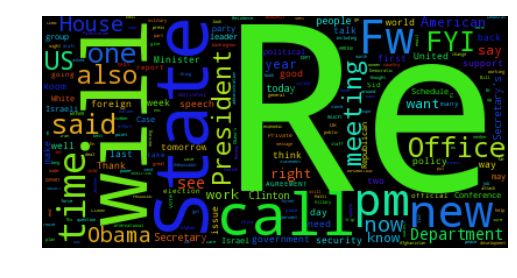

In [13]:
# Generate a word cloud image
wordcloud = WordCloud().generate(test_text)
# Display the generated image:
# the matplotlib way: 
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")


##  PREPROCESSING

### TOKENIZATION

For example, you can define a tokenizer that picks out sequences of alphanumeric characters as tokens and drops everything else:



the following tokenizer forms tokens out of alphabetic sequences,
money expressions,

In [14]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|\$')

In [15]:
tokens = tokenizer.tokenize(test_text)

### CASE FOLDING

In [16]:
tokens_lower_case = [token.lower() for token in tokens ]

### REMOVE STOPWORDS 

In [17]:
stop_words = STOPWORDS

In [18]:
len(tokens_lower_case)

444927

In [19]:
filtered_words_tmp = [word for word in tokens_lower_case if word not in stop_words]

In [20]:
len(filtered_words_tmp)

271349

In [21]:
stop_words_2 = stopwords.words('english')

In [22]:
filtered_words_lower_case = [word for word in filtered_words_tmp if word not in stop_words_2]

In [23]:
len(filtered_words_lower_case)

256562

### STEMMING

In [24]:
porter = nltk.PorterStemmer()

token_stem_lower_case = [porter.stem(token) for token in filtered_words_lower_case]

## WORLDCLOUD NEW 

#### WITH STEMMING 

In [25]:
new_text = " ".join(token_stem_lower_case)

(-0.5, 399.5, 199.5, -0.5)

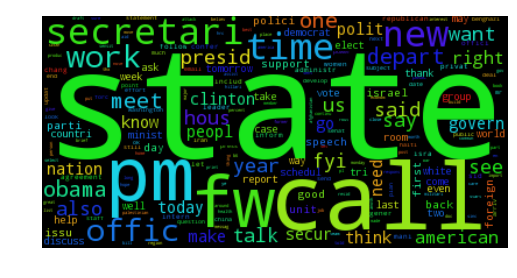

In [26]:
# Generate a word cloud image
wordcloud = WordCloud().generate(new_text)
# Display the generated image:
# the matplotlib way: 
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")


####  WITHOUT STEMMING

(-0.5, 399.5, 199.5, -0.5)

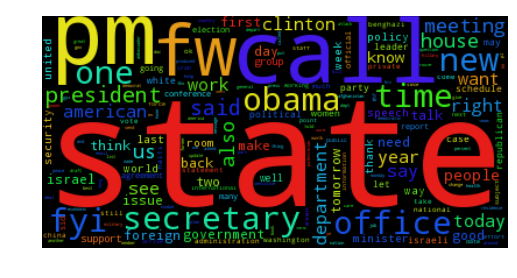

In [27]:
new_text = " ".join(filtered_words_lower_case)
# Generate a word cloud image
wordcloud = WordCloud().generate(new_text)
# Display the generated image:
# the matplotlib way: 
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")


# QUESTION  2

 1 - check if there is a country and also the abreviation in bodytext one by one
 2 - If is not there ignore the email
 3 - If it's there add the country in the new column in a list (it may be multiple)
 

In [28]:
from nltk.sentiment.util import *

/home/trinh/anaconda2/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [30]:
email_df['token'] = email_df['ExtractedBodyText'].apply(tokenizer.tokenize)
email_df['token'].head()

2                                                 [Thx]
5     [Pis, print, H, hrod17, clintonernailcom, Wedn...
8                                                 [FYI]
9     [B6, Wednesday, September, 12, 2012, 6, 16, PM...
10                                            [Fyi, B6]
Name: token, dtype: object

In [31]:
email_df['token_subject'] = email_df['ExtractedSubject'].apply(tokenizer.tokenize)
email_df['token_subject'].head()

2                                  [Re, Chris, Stevens]
5     [Meet, The, Right, Wing, Extremist, Behind, An...
8                          [FVV, Secretary, s, remarks]
9                                     [more, on, Libya]
10    [AbZ, and, Hb3, on, Libya, and, West, Bank, Gaza]
Name: token_subject, dtype: object

In [32]:
def get_polarity_score(text):
    """ return score between 0 and 1, 0 is bad 1 is happy"""
    vader_analyzer = SentimentIntensityAnalyzer()
    return (vader_analyzer.polarity_scores(text)['compound']+1)/2

In [33]:
def return_country_test(df_row,country_sentiment):
    vader_analyzer = SentimentIntensityAnalyzer()
    tmp = []
    #fetch row by row the ExtractedBodyText and the Extracted Subject
    token_list_extractedbodytext = df_row['token']
    token_list_extractedsubject = df_row['token_subject']
    raw_text = df_row['ExtractedBodyText']
    # remove the stopwords of the list of token for both field
    extractedbodytext = [word for word in token_list_extractedbodytext if word not in stop_words]
    extractedsubject = [word for word in token_list_extractedsubject if word not in stop_words]
    
    #look in the extractedbodytext
    for token in extractedbodytext:
        try:
            country = pc.countries.get(name = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None    
        try:
            country=pc.countries.get(alpha_2 = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None
            
    
    #look in the extractedSubject
    for token in extractedsubject:
        try:
            country = pc.countries.get(name = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None    
        try:
            country=pc.countries.get(alpha_2 = token).name
            if country not in tmp:
                tmp.append(country)   
        except:
            None
            
    #compute the sentiment on the ExtractedBodyText (not token form)
    sentiment = (vader_analyzer.polarity_scores(raw_text)['compound']+1)/2
            
    for elem in tmp:
        if elem in country_sentiment.index:
            country_sentiment.loc[elem]['NumberTimes'] = country_sentiment.loc[elem]['NumberTimes']+1
        else:
            country_sentiment.set_value(elem,['NumberTimes','Sentiment'],[1,0])
        
        #add the sentiment for each country mentionned in the email
        
        country_sentiment.loc[elem]['Sentiment'] = country_sentiment.loc[elem]['Sentiment']+sentiment
            
    

    
    

In [34]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+|\$')

In [35]:
country_sentiment = pd.DataFrame(columns=['NumberTimes','Sentiment'])

In [36]:
country_sentiment

,NumberTimes,Sentiment


In [37]:
_=email_df.apply(return_country_test,args=(country_sentiment,),axis=1)

In [38]:
# TONGA = TO, SAINT PIERRE AND MIQUELON = PM, NORWAY = NO, ARMENIA = AM, Réunion = RE, Micronesia = FM

In [39]:
country_sentiment.sort_values(by='NumberTimes',ascending=False)

,NumberTimes,Sentiment
Réunion,348.0,219.13720
United States,170.0,118.35220
Armenia,167.0,115.39235
Saint Pierre and Miquelon,165.0,102.87155
Haiti,138.0,87.73705
India,136.0,86.16800
Tonga,82.0,47.19255
Afghanistan,82.0,54.76525
Pakistan,78.0,49.46915
"Micronesia, Federated States of",72.0,43.99025


In [55]:
def average_sentiment(dataframe):
    return dataframe['Sentiment']/dataframe['NumberTimes']

In [57]:
country_sentiment['Sentiment'] = country_sentiment.apply(average_sentiment, axis=1)

In [58]:
country_sentiment

,NumberTimes,Sentiment
Saint Pierre and Miquelon,165.0,0.623464
Tonga,82.0,0.575519
Norway,54.0,0.507347
Libya,63.0,0.537657
Réunion,348.0,0.629705
United States,170.0,0.696189
Egypt,29.0,0.722303
Yemen,8.0,0.641863
Armenia,167.0,0.690972
Anguilla,3.0,0.500650


# QUESTION 3